In [1]:
import xgbClassification as classi
import xgbMulticlassClassification as mclassi
import xgbRegression as reg
import xgbVisualisation as viz
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = pd.read_csv('./../ejerciciosModelosSupervisados/deteccion_transacciones_fraudulentas/datos/data_fraude.csv')

In [3]:
# pre-process datos (si es necesario)
df = df.rename(columns={'0.1':'Class'}).drop('Unnamed: 0',axis=1)

In [4]:
yvar = df.Class
xvars = df[[x for x in df.columns if x != 'Class']]

In [5]:
# dividir train / test para variables independientes (x)  y dependiente (y)
xtrain, xtest, ytrain, ytest = train_test_split(xvars, yvar, train_size = 0.80, random_state = 2)

In [6]:
trainXGB = classi.makeXGBMatrix(data=xtrain,
                                label=ytrain)

testXGB = classi.makeXGBMatrix(xtest,
                               ytest)

In [7]:
finalXGB = classi.findXGBClassification(trainXGB,
                                        testXGB,
                                        xtrain,
                                        ytrain,
                                        xtest,
                                        ytest,
                                        iters=10)

[0]	train-auc:0.97648+0.00424	test-auc:0.96859+0.01578
[1]	train-auc:0.98555+0.00342	test-auc:0.97484+0.01291
[2]	train-auc:0.98966+0.00162	test-auc:0.98207+0.00908
[3]	train-auc:0.99171+0.00126	test-auc:0.98393+0.00797
[4]	train-auc:0.99281+0.00112	test-auc:0.98545+0.00870
[5]	train-auc:0.99361+0.00132	test-auc:0.98782+0.00709
[6]	train-auc:0.99398+0.00102	test-auc:0.98859+0.00640
[7]	train-auc:0.99474+0.00076	test-auc:0.98882+0.00615
[8]	train-auc:0.99528+0.00066	test-auc:0.98972+0.00598
[9]	train-auc:0.99568+0.00067	test-auc:0.99053+0.00556
[0]	train-auc:0.99191+0.00098	test-auc:0.98188+0.00755
[1]	train-auc:0.99415+0.00111	test-auc:0.98567+0.00816
[2]	train-auc:0.99519+0.00147	test-auc:0.98735+0.00741
[3]	train-auc:0.99607+0.00124	test-auc:0.98980+0.00473
[4]	train-auc:0.99645+0.00109	test-auc:0.99129+0.00415
[5]	train-auc:0.99688+0.00088	test-auc:0.99238+0.00471
[6]	train-auc:0.99722+0.00065	test-auc:0.99241+0.00486
[7]	train-auc:0.99751+0.00045	test-auc:0.99233+0.00488
[8]	train-

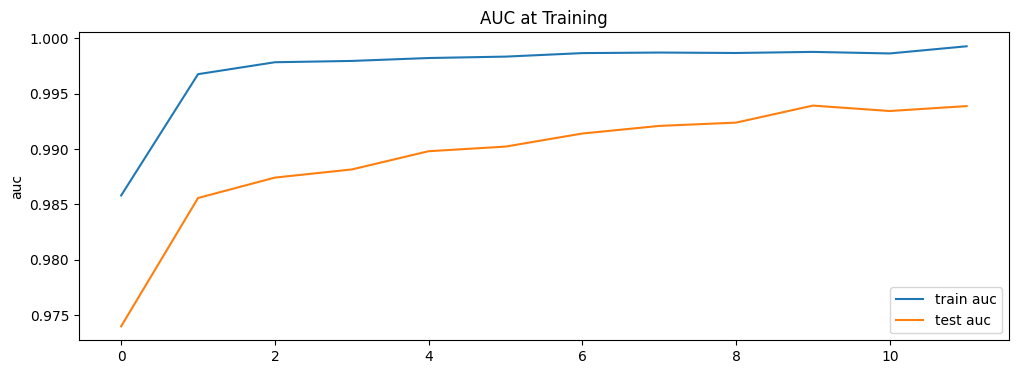

In [8]:
viz.visualise_metrics(finalXGB)

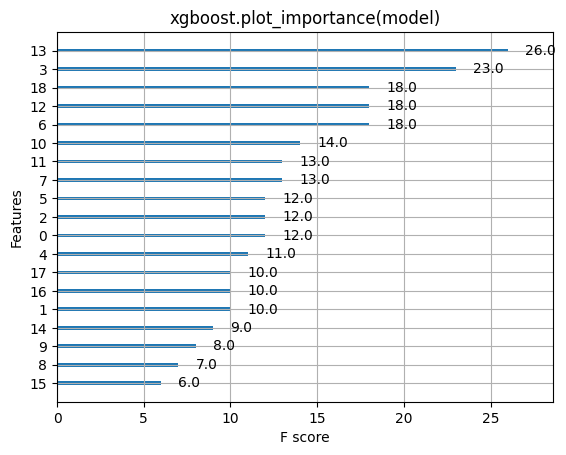

In [9]:
viz.plotVariableImportance(finalXGB, viz_type=None)

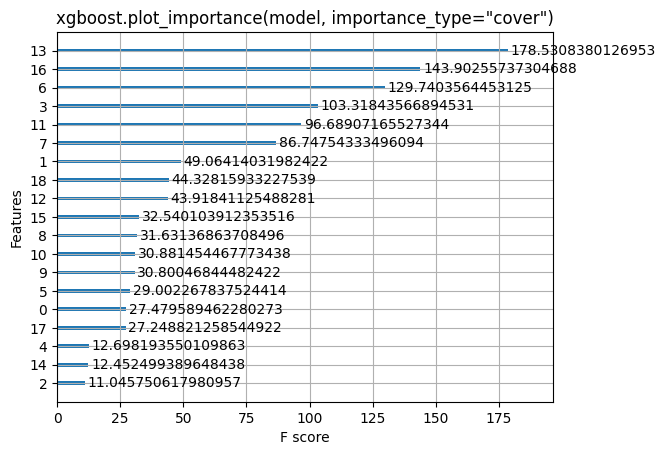

In [10]:
viz.plotVariableImportance(finalXGB, viz_type='cover')

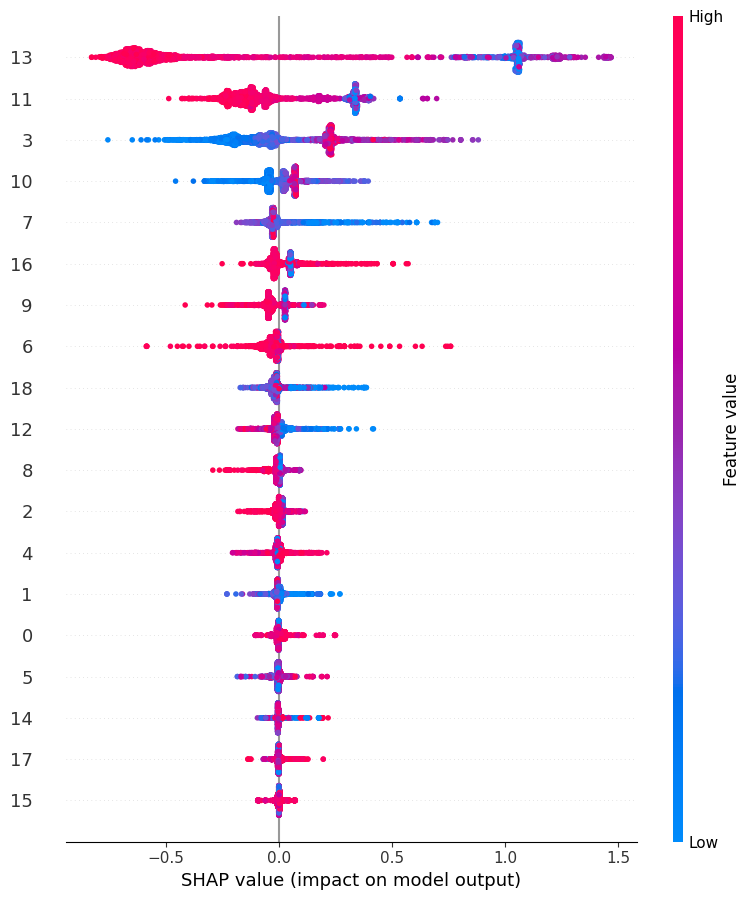

In [12]:
viz.make_shap_visualisation(finalXGB, xtrain)